
### Vectorization vs Naive Loop; Numeric Stability demo
Features:
 - Timing bar chart comparing vectorized and loop.
 - Price matching within rtol=1e-9 (realistic tolerance).
 - Summary of speedup factor.


In [2]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters
N = 1_000_000
mu = 0.0002
sigma = 0.02
S0 = 100.0
rng: np.random.Generator = np.random.default_rng(42)

In [73]:
# Helper functions (take 'r' array as input so both methods use the same draws)
loop_returns = []

def simulate_returns_loop_from_r(r: np.ndarray, S0: float = 100.0):
    """Naive loop to compute cumulative price from an array of returns r."""
    S = S0
    for ri in r:
        S *= (1 + ri)
        loop_returns.append(S)
    return S

def simulate_returns_vectorized_from_r(r: np.ndarray, S0: float = 100.0):
    """Vectorized computation of cumulative price from an array of returns r."""
    # use log1p for numeric stability when ri is small
    log_returns = np.log1p(r)
    S = S0 * np.exp(np.sum(log_returns))
    return S

In [78]:
# Generate returns once (so both methods use the exact same random draws)
r = rng.normal(mu, sigma, size=N)

# Timing the loop method (operates on the same r)
t0 = time.perf_counter()
S_loop = simulate_returns_loop_from_r(r, S0)
t1 = time.perf_counter()
# Timing the vectorized method (same r)
S_vec = simulate_returns_vectorized_from_r(r, S0)
t2 = time.perf_counter()

time_loop = t1 - t0
time_vec = t2 - t1
speedup = time_loop / time_vec if time_vec > 0 else np.inf
match = np.isclose(S_loop, S_vec, rtol=1e-9, atol=1e-12)
print(f"Final price (loop): {S_loop:.2f}, time: {time_loop:.4f} sec")
print(f"Final price (vectorized): {S_vec:.2f}, time: {time_vec:.4f} sec")
print(f"Speedup: {speedup:.2f}x")

assert np.allclose(S_loop, S_vec, rtol=1e-9, atol=1e-12 ), "Vec and loop differ beyond tolerance!"


Final price (loop): 9986.55, time: 0.2605 sec
Final price (vectorized): 9986.55, time: 0.0111 sec
Speedup: 23.42x


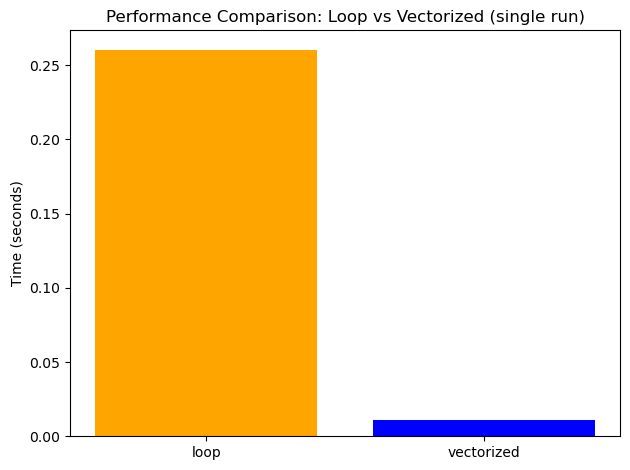

In [82]:
# Plotting
plt.bar(['loop', 'vectorized'], [time_loop, time_vec], color=['orange', 'blue'])
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Loop vs Vectorized (single run)')
plt.tight_layout()


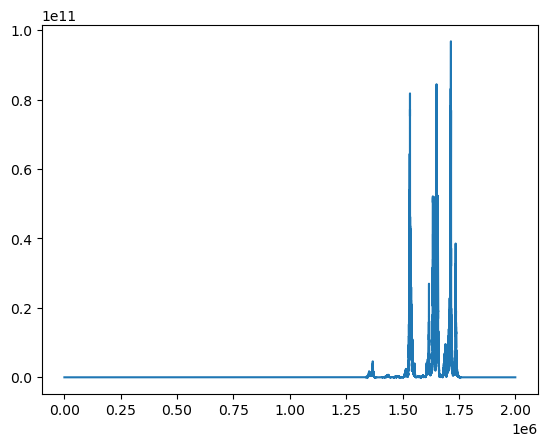

In [80]:
plt.plot(loop_returns, label='Loop Method')
plt.show()

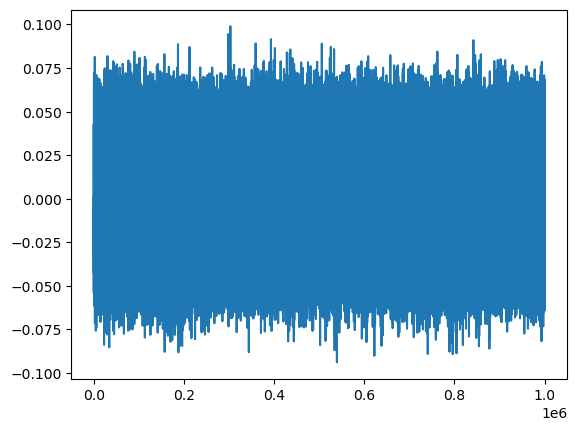

In [81]:
plt.plot(r, label='Returns')
plt.show()